In [23]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import seaborn as sns


In [24]:
# Load data
df = pd.read_csv("vgsales.csv")
df = df.dropna()

In [25]:
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [26]:
df.isna()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
16593,False,False,False,False,False,False,False,False,False,False,False
16594,False,False,False,False,False,False,False,False,False,False,False
16595,False,False,False,False,False,False,False,False,False,False,False
16596,False,False,False,False,False,False,False,False,False,False,False


In [27]:
df.isna().sum()

Rank            0
Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64

In [28]:
# Encode categorical variables
label_encoders = {}
for col in ['Name', 'Platform', 'Genre', 'Publisher']:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

In [29]:
# Features and target
features = ['Platform', 'Year', 'Genre', 'Publisher', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']
X = df[features]
y = df['Global_Sales']

In [30]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [31]:
# Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)
lr_preds = lr.predict(X_test)
lr_r2 = r2_score(y_test, lr_preds)
print("Linear Regression R² Score:", lr_r2)

Linear Regression R² Score: 0.999993294968631


In [32]:
# Random Forest Regressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
rf_preds = rf.predict(X_test)
rf_r2 = r2_score(y_test, rf_preds)
print("Random Forest R² Score:", rf_r2)

Random Forest R² Score: 0.82313869852597


In [33]:
# KNN Regressor
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train, y_train)
knn_preds = knn.predict(X_test)
knn_r2 = r2_score(y_test, knn_preds)
print("KNN R² Score:", knn_r2)

KNN R² Score: 0.6906574771411422


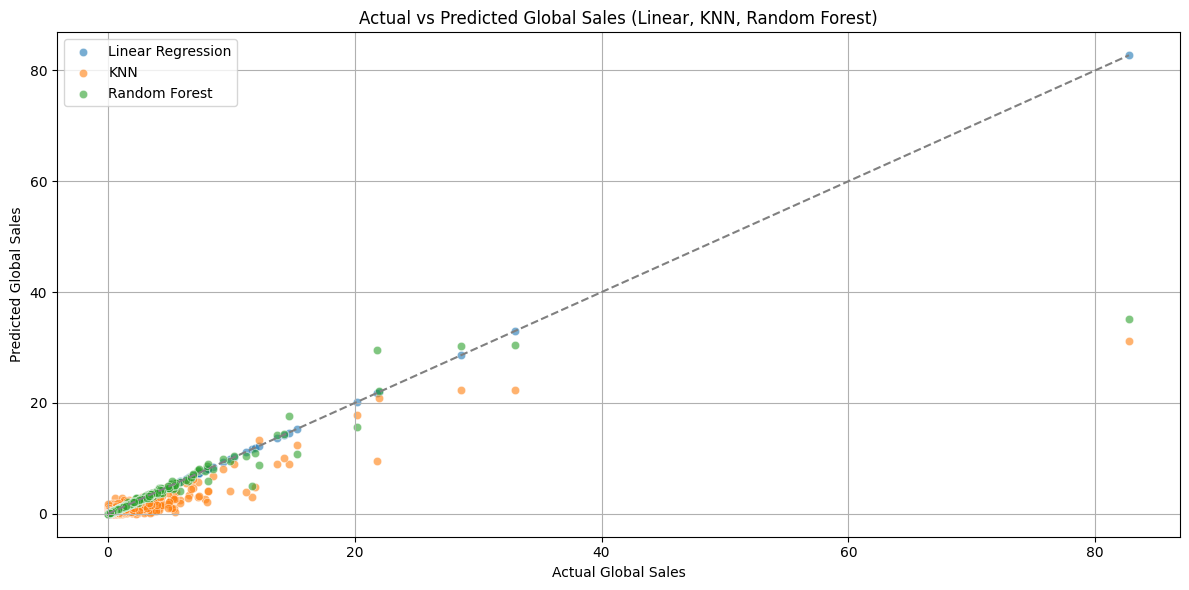

In [47]:
# Visualization
plt.figure(figsize=(12, 6))
sns.scatterplot(x=y_test, y=lr_preds, label="Linear Regression", alpha=0.6)
sns.scatterplot(x=y_test, y=knn_preds, label="KNN", alpha=0.6)
sns.scatterplot(x=y_test, y=rf_preds, label="Random Forest", alpha=0.6)
plt.plot([0, max(y_test)], [0, max(y_test)], '--', color='gray')  # ideal prediction line
plt.xlabel("Actual Global Sales")
plt.ylabel("Predicted Global Sales")
plt.title("Actual vs Predicted Global Sales (Linear, KNN, Random Forest)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()